In [13]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In [100]:
def adj_matrix_eig_dist(n=10,weighted=False,self_loops=False,directed=False,bins=np.zeros(3)):
    '''
    returns distribution of eigenvalues of the adjaceny matrix of a graph
    n: number of nodes
    weighted: weighted edges or not
    self_loops: self loops allowed or not
    directed: directed graph if true, undirected if false
    returns:
    p: percentage of eigenvalues in the bin
    b: bin (range of eigenvalues)
    '''
    if not weighted:
        A = np.random.randint(0,2,size=n**2).reshape((n,n))
    else:
        print("Weighted graphs not yet supported")
    if not directed:
        A = A*A.T
    if not self_loops:
        M = A-np.diag(np.diag(A))
    
    u,v = la.eig(M)
    if (bins==0).all():
        p,b = np.histogram(u,bins=20,density=True)
    else:
        p,b = np.histogram(u,bins=bins,density=True)
    return p, b

In [102]:
N = 500
samples = 100

for i in range(samples):
    if i==0:
        p,b = adj_matrix_eig_dist(n=N,bins=np.arange(-7*np.sqrt(N),7*np.sqrt(N),0.1))
    else:
        p_,b = adj_matrix_eig_dist(n=N,bins=np.arange(-7*np.sqrt(N),7*np.sqrt(N),0.1))
        p += p_
p = p / samples

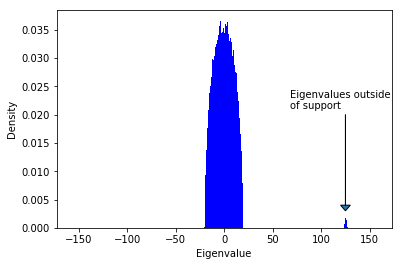

In [124]:
plt.bar(b[:-1],p,color='blue',label='Eigenvalue distribution')
#plt.plot(x,y,c='red',label=r'$\sqrt{n-x^2}/6\pi\sqrt{n}$') # DOES NOT FIT EXACTLY TO SEMI_CIRCLE LAW OF SUPPORT
#plt.legend(loc='upper left')
plt.xlabel('Eigenvalue')
plt.ylabel('Density')
plt.arrow(125,0.02,0,-0.016,head_width=10,head_length=0.001)
plt.text(68,0.021,'Eigenvalues outside\nof support')
plt.show()